In [1]:
## Importing Libraries
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

/home/marcus/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#Read Data
data = input_data.read_data_sets(".",one_hot = True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./t10k-labels-idx1-ubyte.gz


In [3]:
len(data.train.labels)

55000

In [4]:
len(data.test.labels)

10000

In [5]:
len(data.validation.labels)

5000

In [6]:
def plot_images(img):
    plt.imshow(img.reshape(28,28),cmap="binary")

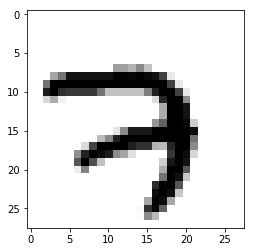

In [7]:
plot_images(data.train.images[0,:])

In [8]:
#Placeholder for input image 
img = tf.placeholder(tf.float32, [None, 784])

#Placeholder for one-hot labels
y = tf.placeholder(tf.float32, [None, 10])

#Placeholder for labels(For Val/test)
y_labels = tf.placeholder(tf.int64, [None])

#Weights
weights = tf.get_variable("weights",[784,256],initializer = tf.random_normal_initializer(stddev=0.02))

#Bias
bias = tf.get_variable("biases",[256],initializer = tf.constant_initializer(0.0))

#Linear Layer
hidden1 = tf.matmul(img,weights) + bias
#Apply Batchnorm
hidden1 = tf.contrib.layers.batch_norm(hidden1)
#Apply RELU
hidden1 = tf.nn.relu(hidden1)

#Weights
weights1 = tf.get_variable("weights1",[256,10],initializer=tf.random_normal_initializer(stddev = 0.02))
#bias
bias1 = tf.get_variable("bias1",[10],initializer=tf.constant_initializer(0.0))

#Linear Layer
logits = tf.matmul(hidden1, weights1) + bias1

#apply Batchnorm
logits = tf.contrib.layers.batch_norm(logits)
#Apply Softmax
output = tf.nn.softmax(logits)
output_class = tf.argmax(output,axis=1)

In [9]:
#Define loss function
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = y))

#Define Optimizer
optim = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [10]:
#Accuracy
correct_labels = tf.equal(output_class, y_labels)
accuracy = tf.reduce_mean(tf.cast(correct_labels, tf.float32))

In [12]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
#Make batches to train
num_iter = 1000
batch_size = 64
for i in range(num_iter):
    batch_img, batch_y = data.train.next_batch(batch_size)
    _, l = sess.run([optim, loss],feed_dict = {img: batch_img , y: batch_y})
    print(l)
labels = np.array([label.argmax() for label in data.test.labels])
accuracy,weights = sess.run([accuracy,weights],feed_dict = {img: data.test.images, y: data.test.labels, y_labels: labels})
print ("Accuracy" ,accuracy)

2.8853302
1.1050818
1.123575
1.1132703
0.9916382
0.8573084
0.9305194
1.0189694
1.0017389
0.9415014
0.8858081
0.8717656
0.78910995
0.91819406
0.916211
0.8401696
0.77106416
0.96522856
0.84667516
0.8561946
0.8345649
0.7650283
0.77668935
0.68916273
0.7620949
0.8761859
0.79776514
0.717631
0.88185596
0.83923936
0.7277568
0.7089176
0.6301521
0.8729042
0.8839023
0.7054789
0.6947626
0.7813012
0.67370296
0.66878164
0.7558331
0.7290529
0.7465426
0.83561456
0.68486583
0.62004274
0.74526304
0.6380303
0.67287296
0.68211246
0.6888718
0.8600962
0.6600705
0.69276476
0.67444086
0.60259163
0.7837819
0.7483929
0.721493
0.60391563
0.6654919
0.65712494
0.8640977
0.6424848
0.6589201
0.73716325
0.64358115
0.7492537
0.7133314
0.64080787
0.6192984
0.7207679
0.6248862
0.7355428
0.6687544
0.6130041
0.6648424
0.690503
0.62156
0.6758244
0.70009923
0.84138024
0.6190671
0.75574565
0.7152302
0.6133267
0.6845889
0.8044086
0.65723825
0.63598865
0.7504389
0.55122477
0.6204542
0.61052084
0.65588415
0.6091253
0.61618996
0.

0.54894686
0.47581434
0.5725294
0.50858516
0.49542436
0.56526697
0.6080752
0.49945563
0.558424
0.4972365
0.44739652
0.59209144
0.52994686
0.684561
0.46591067
0.52774394
0.5232926
0.50602937
0.5267401
0.49673313
0.51764345
0.47665918
0.5633858
0.49142528
0.53650594
0.54402524
0.5176256
0.5015774
0.5429568
0.5612571
0.51862925
0.48056227
0.4585796
0.45454365
0.48719153
0.605219
0.47010958
0.48255193
0.5837519
0.57925916
0.44434595
0.527577
0.5554565
0.5024241
0.5324938
0.6122029
0.57197344
0.42349243
0.53110594
0.55350304
0.5670985
0.5323646
0.5413667
0.45072716
0.5184406
0.5873963
0.59660923
0.5353112
0.51136386
0.4829424
0.44545788
0.5702505
0.49014255
0.61545265
0.47992575
0.43667358
0.5719543
0.44868106
0.5112169
0.52110064
0.44047862
0.4906513
0.52782327
0.48068124
0.50005174
0.5517797
0.50729924
0.5352946
0.51486385
0.5411395
0.5471628
0.44742396
0.54510176
0.50398606
0.4729956
0.5459237
0.48017615
0.5229077
0.47900587
0.53525865
0.6034586
0.46870095
0.5903138
0.46737272
0.50165164